In [ ]:
import pandas as pd

data = { 'name': ['Fuat', 'Aykut', 'Erkut'],
			'midterm': [60, 85, 100],
			'final': [69, 90, 100],
			'attendance': [6, 10, 10]
}

df_bbm101 = pd.DataFrame(data)

print(df_bbm101.head())	# Prints top 5 rows




    name  midterm  final  attendance
0   Fuat       60     69           6
1  Aykut       85     90          10
2  Erkut      100    100          10


In [ ]:

names = ['Fuat', 'Aykut', 'Erkut']
midterms = [60, 85, 100]
finals = [69, 90, 100]
attendances = [6, 10, 10]

list_labels = ['name', 'midterm', 'final', 'attendance']
list_cols = [names, midterms, finals, attendances]

zipped = list(zip(list_labels, list_cols))

print(zipped)  	# [('name', ['Fuat', 'Aykut', 'Erkut']),
					# ('midterm', [60, 85, 100]),
					# ('final', [69, 90, 100]),
					# ('attendance', [6, 10, 10])]

data = dict(zipped)

df_bbm101 = pd.DataFrame(data)

print(df_bbm101.head())	# Prints top 5 rows

[('name', ['Fuat', 'Aykut', 'Erkut']), ('midterm', [60, 85, 100]), ('final', [69, 90, 100]), ('attendance', [6, 10, 10])]
    name  midterm  final  attendance
0   Fuat       60     69           6
1  Aykut       85     90          10
2  Erkut      100    100          10


In [ ]:
df_bbm101['total'] = 0
# Adds new column to df and
# broadcasts 0 to entire column

print(df_bbm101.head())


    name  midterm  final  attendance  total
0   Fuat       60     69           6      0
1  Aykut       85     90          10      0
2  Erkut      100    100          10      0


In [ ]:
df_bbm101['total'] = df_bbm101['midterm']*0.3 + df_bbm101['final']*0.6 + df_bbm101['attendance']

df_bbm101.loc[(df_bbm101['total'] >= 60) & 	(df_bbm101['total'] < 70), 'grade'] = 'D'

#......... Other Grades............

df_bbm101.loc[df_bbm101['total'] >= 90, 'grade'] = 'A'

print(df_bbm101.head())


    name  midterm  final  attendance  total grade
0   Fuat       60     69           6   65.4     D
1  Aykut       85     90          10   89.5   NaN
2  Erkut      100    100          10  100.0     A


In [ ]:
print(df_bbm101[['name', 'grade']])
print()

print(df_bbm101.iloc[:, [0, 5]])
print()

print(df_bbm101.iloc[:, [True, False, False, False, False, True]])


    name grade
0   Fuat     D
1  Aykut   NaN
2  Erkut     A

    name grade
0   Fuat     D
1  Aykut   NaN
2  Erkut     A

    name grade
0   Fuat     D
1  Aykut   NaN
2  Erkut     A


In [ ]:


# IMMIGRATION EXAMPLE #

df = pd.read_excel('Canada.xlsx',sheet_name='Canada by Citizenship', skiprows=range(20),skipfooter=2)

print(df.head())





          Type    Coverage               OdName  AREA  \
0   Immigrants  Foreigners          Afghanistan   935   
1   Immigrants  Foreigners              Albania   908   
2   Immigrants  Foreigners              Algeria   903   
3   Immigrants  Foreigners       American Samoa   909   
4   Immigrants  Foreigners              Andorra   908   
5   Immigrants  Foreigners               Angola   903   
6   Immigrants  Foreigners  Antigua and Barbuda   904   
7   Immigrants  Foreigners            Argentina   904   
8   Immigrants  Foreigners              Armenia   935   
9   Immigrants  Foreigners            Australia   909   
10  Immigrants  Foreigners              Austria   908   
11  Immigrants  Foreigners           Azerbaijan   935   
12  Immigrants  Foreigners              Bahamas   904   
13  Immigrants  Foreigners              Bahrain   935   
14  Immigrants  Foreigners           Bangladesh   935   

                           AreaName   REG                    RegName  DEV  \
0         

In [ ]:
df_canada = df.drop(columns=['Type', 'Coverage', 'AREA', 'REG', 'DEV'])
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_canada.set_index('Country', inplace=True)
df_canada['Total'] = df_canada.sum(axis=1)

print(df_canada.head(15))

                                           Continent  \
Country                                                
Afghanistan                                     Asia   
Albania                                       Europe   
Algeria                                       Africa   
American Samoa                               Oceania   
Andorra                                       Europe   
Angola                                        Africa   
Antigua and Barbuda  Latin America and the Caribbean   
Argentina            Latin America and the Caribbean   
Armenia                                         Asia   
Australia                                    Oceania   
Austria                                       Europe   
Azerbaijan                                      Asia   
Bahamas              Latin America and the Caribbean   
Bahrain                                         Asia   
Bangladesh                                      Asia   

                                        Region 

<ipython-input-30-4af3d0c02140>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_canada['Total'] = df_canada.sum(axis=1)


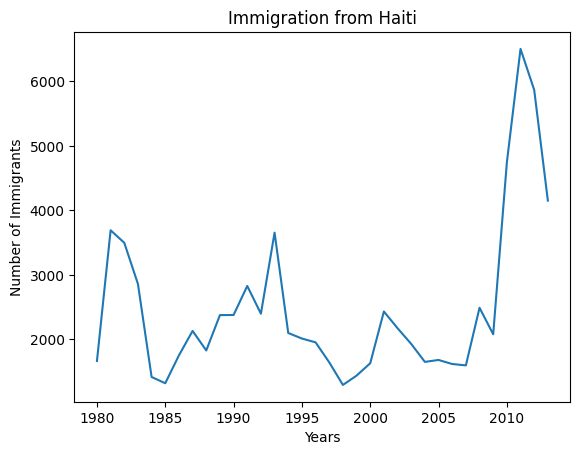

In [ ]:
import matplotlib.pyplot as plt


years = list(range(1980, 2014))
df_canada.loc['Haiti', years].plot(kind = 'line')

plt.title('Immigration from Haiti')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()


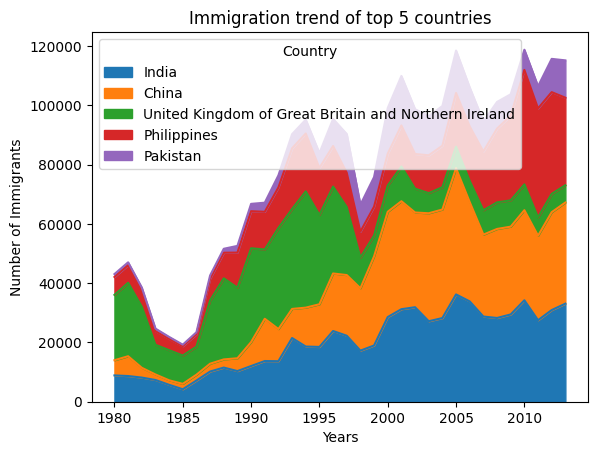

In [ ]:
df_canada.sort_values(['Total'], ascending=False,
							axis=0, inplace=True)
df_top5 = df_canada.head()
df_top5 = df_top5[years].transpose()
df_top5.plot(kind='area')

plt.title('Immigration trend of top 5 countries')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')

plt.show()


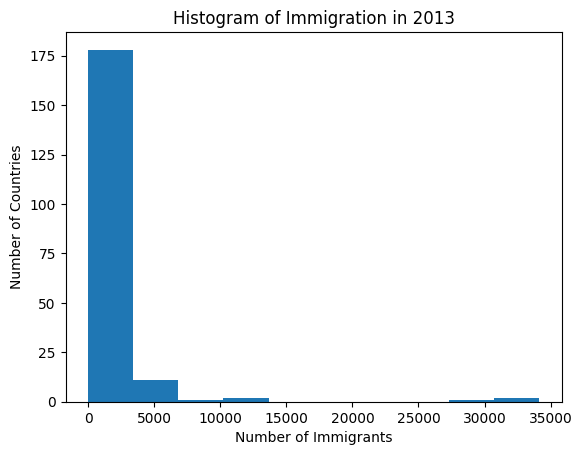

In [ ]:
df_canada[2013].plot(kind='hist')

plt.title('Histogram of Immigration in 2013')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')

plt.show()


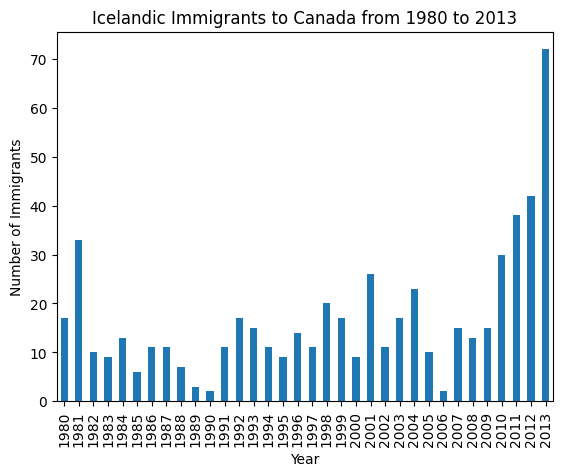

In [ ]:
df_iceland = df_canada.loc['Iceland', years]
df_iceland.plot(kind='bar')

plt.title('Icelandic Immigrants to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()


<ipython-input-34-47e2d5d63828>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continents = df_canada.groupby('Continent', axis=0).sum()


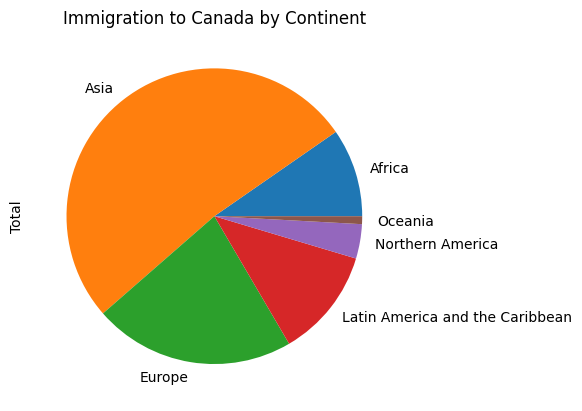

In [ ]:
df_continents = df_canada.groupby('Continent', axis=0).sum()
df_continents['Total'].plot(kind='pie')

plt.title('Immigration to Canada by Continent')

plt.show()
